#### Basic handling of molecules (i.e. reading of molecules, calculation of similarity)
More information can be here:
http://www.rdkit.org/docs/index.html and http://www.rdkit.org/docs/api/index.html

In [1]:
!pip install rdkit
# The majority of the basic molecular functionality is found in module rdkit.Chem
from rdkit import Chem
from rdkit.Chem import AllChem

In [2]:
# Individual molecules can be constructed using a variety of approaches, like SMILES
# FDA approved EGFR inhibitors: Gefitinib, Erlotinib
gefitinib = Chem.MolFromSmiles("COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1")
erlotinib = Chem.MolFromSmiles("C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1")

#### Drawing molecules

In [3]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

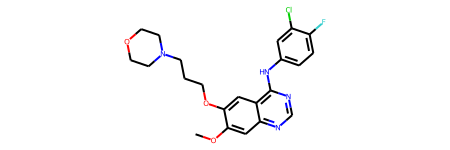

In [4]:
gefitinib

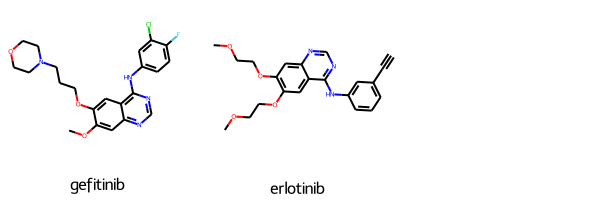

In [5]:
Draw.MolsToGridImage([gefitinib, erlotinib], legends=["gefitinib", "erlotinib"])

### Processing
#### Step 1: Protonation -  by default RDKit molecules do not have H atoms

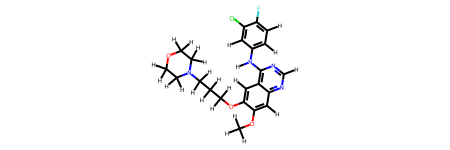

In [6]:
gefitinib_h = Chem.AddHs(gefitinib)
gefitinib_h

In [7]:
print(Chem.MolToMolBlock(gefitinib_h))


     RDKit          2D

 55 58  0  0  0  0  0  0  0  0999 V2000
    0.7500   -6.4952    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -5.1962    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7500    3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.2500    3.8971    0

#### Step 2: Generation of 3D conformation

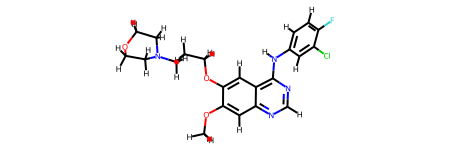

In [8]:
AllChem.EmbedMolecule(gefitinib_h)
AllChem.UFFOptimizeMolecule(gefitinib_h)  # improves the quality of the conformation
gefitinib_h

In [9]:
print(Chem.MolToMolBlock(gefitinib_h))


     RDKit          3D

 55 58  0  0  0  0  0  0  0  0999 V2000
   -1.2630   -4.9332    0.7605 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0964   -3.5203    0.7018 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.1417   -2.8610    0.7651 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.3548   -3.5620    0.8929 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5684   -2.8724    0.9543 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7314   -3.5657    1.0590 N   0  0  0  0  0  0  0  0  0  0  0  0
    4.9250   -2.9251    1.1143 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.9727   -1.5701    1.0743 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.8438   -0.8169    0.9675 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9525    0.6171    0.9850 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.0742    1.3316    0.4374 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.4083    2.5935    0.9533 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.4827    3.3133    0.4230 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.2266    2.7862   -0

#### Step 3: Writing molecule to file 

In [10]:
sd_writer = Chem.SDWriter("./test_mol_3D.sdf")
sd_writer.write(gefitinib_h)
sd_writer.close()  # always close opened files

#### Notes: Sometimes hydrogen are not required and could be removed again 

In [11]:
gefitinib_no_h = Chem.RemoveHs(gefitinib_h)
print(Chem.MolToMolBlock(gefitinib_no_h))


     RDKit          3D

 31 34  0  0  0  0  0  0  0  0999 V2000
   -1.2630   -4.9332    0.7605 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0964   -3.5203    0.7018 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.1417   -2.8610    0.7651 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.3548   -3.5620    0.8929 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5684   -2.8724    0.9543 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7314   -3.5657    1.0590 N   0  0  0  0  0  0  0  0  0  0  0  0
    4.9250   -2.9251    1.1143 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.9727   -1.5701    1.0743 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.8438   -0.8169    0.9675 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9525    0.6171    0.9850 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.0742    1.3316    0.4374 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.4083    2.5935    0.9533 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.4827    3.3133    0.4230 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.2266    2.7862   -0